Best Model Results:
Best Accuracy: 0.2000107256680559
Precision: 0.19299959085222534
Recall: 0.2000107256680559
F1-Score: 0.11689130545762796
Best Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.04      0.06     26106
           1       0.20      0.81      0.32     26105
           2       0.19      0.02      0.04     26106
           3       0.20      0.13      0.16     26106
           4       0.18      0.00      0.00     26105

    accuracy                           0.20    130528
   macro avg       0.19      0.20      0.12    130528
weighted avg       0.19      0.20      0.12    130528

Best Confusion Matrix:
[[  960 21042   595  3447    62]
 [  945 21098   583  3410    69]
 [  972 21153   547  3368    66]
 [ 1028 20974   588  3445    71]
 [  967 21088   551  3442    57]]


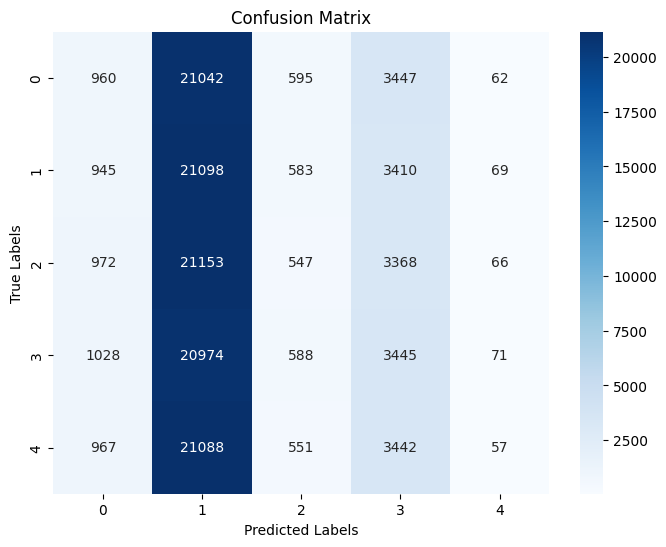

Best Parameters: {'estimator__max_depth': 5, 'learning_rate': 1.0, 'n_estimators': 200}


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load your dataset (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv')

# Preprocessing (assuming a 'label' column exists or you can create one)
#Important Note: This code assumes you have a 'label' column in your dataset.
#The MIT-BIH Arrhythmia Database requires significant preprocessing to generate labels.
#You will need to implement a robust method for labeling the heartbeats according to arrhythmia types.
#This often involves using annotations provided with the original database.
#This example shows a placeholder.
#If your data is not labeled, this code will not produce meaningful results.

#Example of placeholder labelling (you will need to replace this with accurate labelling)
#This code will create a random label for demonstration purpose.
if 'label' not in df.columns:
    df['label'] = np.random.randint(0, 5, df.shape[0]) # Creates random labels. replace with real labels.

# Drop unnecessary columns (e.g., 'Unnamed: 0', 'time_ms' if not needed for features)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
if 'time_ms' in df.columns:
    df = df.drop('time_ms', axis=1)

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter Tuning with GridSearchCV
weak_learner = DecisionTreeClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]
}

ada_boost = AdaBoostClassifier(estimator=weak_learner, random_state=42)
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Model Results:")
print(f"Best Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Best Classification Report:\n{report}")
print(f"Best Confusion Matrix:\n{conf_matrix}")

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print best parameters
print("Best Parameters:", grid_search.best_params_)